

> # **📌 Project Overview**

**This ML project predicts the match result:**

**0 = Loss**

**1 = Draw**

**2 = Win**

**It includes:**

**Cleaning and preprocessing the dataset**

**Feature engineering (rolling windows, form, home/away, etc.)**

**Encoding categorical features**

**Scaling numeric features**

**Training multiple ML models**

**Hyperparameter tuning (Randomized Search / Grid Search)**

**Final model selection (CatBoost achieved ~73% accuracy)**





In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea
import warnings
warnings.filterwarnings('ignore')

In [118]:
df = pd.read_csv('/content/final_matches.csv')
df.head()

,date,comp,round,day,venue,result,opponent,xg,xga,poss,...,pkatt,team,season,Rolling Average 5 Sh,rolling_avg_sot,rolling_avg_xg,Rolling win rate,goal_diff,is_home,prev_date
0,2020-12-06,Premier League,Matchweek 11,Sun,Away,0,Tottenham,0.6,0.3,69.0,...,0,Arsenal,2021,11.000000,2.000000,0.600000,0.0,-2,0,NaN
1,2020-12-13,Premier League,Matchweek 12,Sun,Home,0,Burnley,1.6,1.4,65.0,...,0,Arsenal,2021,14.500000,4.000000,1.100000,0.0,-1,1,2020-12-06
2,2021-05-19,Premier League,Matchweek 37,Wed,Away,3,Crystal Palace,1.8,1.0,68.0,...,0,Arsenal,2021,11.666667,3.666667,1.333333,1.0,2,0,2020-12-13
3,2021-05-23,Premier League,Matchweek 38,Sun,Home,3,Brighton,0.8,0.2,54.0,...,0,Arsenal,2021,12.750000,4.000000,1.200000,1.5,2,1,2021-05-19
4,2021-08-13,Premier League,Matchweek 1,Fri,Away,0,Brentford,1.3,1.2,64.0,...,0,Arsenal,2022,14.600000,4.000000,1.220000,1.2,-2,0,2021-05-23


> # **🧹 Data Cleaning Steps**

**Dropped irrelevant columns: notes, referee, match report, time**

**Removed missing values when needed**

**Converted date column to datetime**

**Sorted data by team + date to prevent leakage**

**Removed target leakage columns: gf, ga, goal_diff**







In [119]:
df.shape

(3102, 29)

In [120]:
df.isnull().sum()

,0
date,0
comp,0
round,0
day,0
venue,0
result,0
opponent,0
xg,0
xga,0
poss,0


In [121]:
df.isnull().sum()

,0
date,0
comp,0
round,0
day,0
venue,0
result,0
opponent,0
xg,0
xga,0
poss,0


In [122]:
df

,date,comp,round,day,venue,result,opponent,xg,xga,poss,...,pkatt,team,season,Rolling Average 5 Sh,rolling_avg_sot,rolling_avg_xg,Rolling win rate,goal_diff,is_home,prev_date
0,2020-12-06,Premier League,Matchweek 11,Sun,Away,0,Tottenham,0.6,0.3,69.0,...,0,Arsenal,2021,11.000000,2.000000,0.600000,0.0,-2,0,NaN
1,2020-12-13,Premier League,Matchweek 12,Sun,Home,0,Burnley,1.6,1.4,65.0,...,0,Arsenal,2021,14.500000,4.000000,1.100000,0.0,-1,1,2020-12-06
2,2021-05-19,Premier League,Matchweek 37,Wed,Away,3,Crystal Palace,1.8,1.0,68.0,...,0,Arsenal,2021,11.666667,3.666667,1.333333,1.0,2,0,2020-12-13
3,2021-05-23,Premier League,Matchweek 38,Sun,Home,3,Brighton,0.8,0.2,54.0,...,0,Arsenal,2021,12.750000,4.000000,1.200000,1.5,2,1,2021-05-19
4,2021-08-13,Premier League,Matchweek 1,Fri,Away,0,Brentford,1.3,1.2,64.0,...,0,Arsenal,2022,14.600000,4.000000,1.220000,1.2,-2,0,2021-05-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3097,2025-04-26,Premier League,Matchweek 34,Sat,Home,3,Leicester City,2.0,1.1,56.0,...,0,Wolverhampton Wanderers,2025,13.600000,4.000000,1.680000,3.0,3,1,2025-04-20
3098,2025-05-02,Premier League,Matchweek 35,Fri,Away,0,Manchester City,0.4,0.7,37.0,...,0,Wolverhampton Wanderers,2025,13.000000,3.600000,1.520000,2.4,-1,0,2025-04-26
3099,2025-05-10,Premier League,Matchweek 36,Sat,Home,0,Brighton,0.9,1.6,56.0,...,0,Wolverhampton Wanderers,2025,10.600000,3.000000,1.180000,1.8,-2,1,2025-05-02
3100,2025-05-20,Premier League,Matchweek 37,Tue,Away,0,Crystal Palace,1.4,1.7,69.0,...,0,Wolverhampton Wanderers,2025,10.400000,2.600000,0.980000,1.2,-2,0,2025-05-10


In [123]:
# df.drop(['notes'],axis=1,inplace = True)

In [124]:
df

,date,comp,round,day,venue,result,opponent,xg,xga,poss,...,pkatt,team,season,Rolling Average 5 Sh,rolling_avg_sot,rolling_avg_xg,Rolling win rate,goal_diff,is_home,prev_date
0,2020-12-06,Premier League,Matchweek 11,Sun,Away,0,Tottenham,0.6,0.3,69.0,...,0,Arsenal,2021,11.000000,2.000000,0.600000,0.0,-2,0,NaN
1,2020-12-13,Premier League,Matchweek 12,Sun,Home,0,Burnley,1.6,1.4,65.0,...,0,Arsenal,2021,14.500000,4.000000,1.100000,0.0,-1,1,2020-12-06
2,2021-05-19,Premier League,Matchweek 37,Wed,Away,3,Crystal Palace,1.8,1.0,68.0,...,0,Arsenal,2021,11.666667,3.666667,1.333333,1.0,2,0,2020-12-13
3,2021-05-23,Premier League,Matchweek 38,Sun,Home,3,Brighton,0.8,0.2,54.0,...,0,Arsenal,2021,12.750000,4.000000,1.200000,1.5,2,1,2021-05-19
4,2021-08-13,Premier League,Matchweek 1,Fri,Away,0,Brentford,1.3,1.2,64.0,...,0,Arsenal,2022,14.600000,4.000000,1.220000,1.2,-2,0,2021-05-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3097,2025-04-26,Premier League,Matchweek 34,Sat,Home,3,Leicester City,2.0,1.1,56.0,...,0,Wolverhampton Wanderers,2025,13.600000,4.000000,1.680000,3.0,3,1,2025-04-20
3098,2025-05-02,Premier League,Matchweek 35,Fri,Away,0,Manchester City,0.4,0.7,37.0,...,0,Wolverhampton Wanderers,2025,13.000000,3.600000,1.520000,2.4,-1,0,2025-04-26
3099,2025-05-10,Premier League,Matchweek 36,Sat,Home,0,Brighton,0.9,1.6,56.0,...,0,Wolverhampton Wanderers,2025,10.600000,3.000000,1.180000,1.8,-2,1,2025-05-02
3100,2025-05-20,Premier League,Matchweek 37,Tue,Away,0,Crystal Palace,1.4,1.7,69.0,...,0,Wolverhampton Wanderers,2025,10.400000,2.600000,0.980000,1.2,-2,0,2025-05-10


In [125]:
df.isnull().sum()

,0
date,0
comp,0
round,0
day,0
venue,0
result,0
opponent,0
xg,0
xga,0
poss,0


In [126]:
df_2 = df.copy()

In [127]:
df_2

,date,comp,round,day,venue,result,opponent,xg,xga,poss,...,pkatt,team,season,Rolling Average 5 Sh,rolling_avg_sot,rolling_avg_xg,Rolling win rate,goal_diff,is_home,prev_date
0,2020-12-06,Premier League,Matchweek 11,Sun,Away,0,Tottenham,0.6,0.3,69.0,...,0,Arsenal,2021,11.000000,2.000000,0.600000,0.0,-2,0,NaN
1,2020-12-13,Premier League,Matchweek 12,Sun,Home,0,Burnley,1.6,1.4,65.0,...,0,Arsenal,2021,14.500000,4.000000,1.100000,0.0,-1,1,2020-12-06
2,2021-05-19,Premier League,Matchweek 37,Wed,Away,3,Crystal Palace,1.8,1.0,68.0,...,0,Arsenal,2021,11.666667,3.666667,1.333333,1.0,2,0,2020-12-13
3,2021-05-23,Premier League,Matchweek 38,Sun,Home,3,Brighton,0.8,0.2,54.0,...,0,Arsenal,2021,12.750000,4.000000,1.200000,1.5,2,1,2021-05-19
4,2021-08-13,Premier League,Matchweek 1,Fri,Away,0,Brentford,1.3,1.2,64.0,...,0,Arsenal,2022,14.600000,4.000000,1.220000,1.2,-2,0,2021-05-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3097,2025-04-26,Premier League,Matchweek 34,Sat,Home,3,Leicester City,2.0,1.1,56.0,...,0,Wolverhampton Wanderers,2025,13.600000,4.000000,1.680000,3.0,3,1,2025-04-20
3098,2025-05-02,Premier League,Matchweek 35,Fri,Away,0,Manchester City,0.4,0.7,37.0,...,0,Wolverhampton Wanderers,2025,13.000000,3.600000,1.520000,2.4,-1,0,2025-04-26
3099,2025-05-10,Premier League,Matchweek 36,Sat,Home,0,Brighton,0.9,1.6,56.0,...,0,Wolverhampton Wanderers,2025,10.600000,3.000000,1.180000,1.8,-2,1,2025-05-02
3100,2025-05-20,Premier League,Matchweek 37,Tue,Away,0,Crystal Palace,1.4,1.7,69.0,...,0,Wolverhampton Wanderers,2025,10.400000,2.600000,0.980000,1.2,-2,0,2025-05-10


In [128]:
df_2.dropna(inplace= True)

In [129]:
df_2

,date,comp,round,day,venue,result,opponent,xg,xga,poss,...,pkatt,team,season,Rolling Average 5 Sh,rolling_avg_sot,rolling_avg_xg,Rolling win rate,goal_diff,is_home,prev_date
1,2020-12-13,Premier League,Matchweek 12,Sun,Home,0,Burnley,1.6,1.4,65.0,...,0,Arsenal,2021,14.500000,4.000000,1.100000,0.0,-1,1,2020-12-06
2,2021-05-19,Premier League,Matchweek 37,Wed,Away,3,Crystal Palace,1.8,1.0,68.0,...,0,Arsenal,2021,11.666667,3.666667,1.333333,1.0,2,0,2020-12-13
3,2021-05-23,Premier League,Matchweek 38,Sun,Home,3,Brighton,0.8,0.2,54.0,...,0,Arsenal,2021,12.750000,4.000000,1.200000,1.5,2,1,2021-05-19
4,2021-08-13,Premier League,Matchweek 1,Fri,Away,0,Brentford,1.3,1.2,64.0,...,0,Arsenal,2022,14.600000,4.000000,1.220000,1.2,-2,0,2021-05-23
5,2021-08-22,Premier League,Matchweek 2,Sun,Home,0,Chelsea,0.3,3.1,35.0,...,0,Arsenal,2022,13.600000,4.200000,1.160000,1.2,-2,1,2021-08-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3097,2025-04-26,Premier League,Matchweek 34,Sat,Home,3,Leicester City,2.0,1.1,56.0,...,0,Wolverhampton Wanderers,2025,13.600000,4.000000,1.680000,3.0,3,1,2025-04-20
3098,2025-05-02,Premier League,Matchweek 35,Fri,Away,0,Manchester City,0.4,0.7,37.0,...,0,Wolverhampton Wanderers,2025,13.000000,3.600000,1.520000,2.4,-1,0,2025-04-26
3099,2025-05-10,Premier League,Matchweek 36,Sat,Home,0,Brighton,0.9,1.6,56.0,...,0,Wolverhampton Wanderers,2025,10.600000,3.000000,1.180000,1.8,-2,1,2025-05-02
3100,2025-05-20,Premier League,Matchweek 37,Tue,Away,0,Crystal Palace,1.4,1.7,69.0,...,0,Wolverhampton Wanderers,2025,10.400000,2.600000,0.980000,1.2,-2,0,2025-05-10


In [130]:
df['match report'].value_counts()

In [131]:
df_2.shape

(3075, 29)

In [132]:
df_2.drop(['referee','match report','time'],axis=1,inplace = True)

In [133]:
df_2

,date,comp,round,day,venue,result,opponent,xg,xga,poss,...,pkatt,team,season,Rolling Average 5 Sh,rolling_avg_sot,rolling_avg_xg,Rolling win rate,goal_diff,is_home,prev_date
1,2020-12-13,Premier League,Matchweek 12,Sun,Home,0,Burnley,1.6,1.4,65.0,...,0,Arsenal,2021,14.500000,4.000000,1.100000,0.0,-1,1,2020-12-06
2,2021-05-19,Premier League,Matchweek 37,Wed,Away,3,Crystal Palace,1.8,1.0,68.0,...,0,Arsenal,2021,11.666667,3.666667,1.333333,1.0,2,0,2020-12-13
3,2021-05-23,Premier League,Matchweek 38,Sun,Home,3,Brighton,0.8,0.2,54.0,...,0,Arsenal,2021,12.750000,4.000000,1.200000,1.5,2,1,2021-05-19
4,2021-08-13,Premier League,Matchweek 1,Fri,Away,0,Brentford,1.3,1.2,64.0,...,0,Arsenal,2022,14.600000,4.000000,1.220000,1.2,-2,0,2021-05-23
5,2021-08-22,Premier League,Matchweek 2,Sun,Home,0,Chelsea,0.3,3.1,35.0,...,0,Arsenal,2022,13.600000,4.200000,1.160000,1.2,-2,1,2021-08-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3097,2025-04-26,Premier League,Matchweek 34,Sat,Home,3,Leicester City,2.0,1.1,56.0,...,0,Wolverhampton Wanderers,2025,13.600000,4.000000,1.680000,3.0,3,1,2025-04-20
3098,2025-05-02,Premier League,Matchweek 35,Fri,Away,0,Manchester City,0.4,0.7,37.0,...,0,Wolverhampton Wanderers,2025,13.000000,3.600000,1.520000,2.4,-1,0,2025-04-26
3099,2025-05-10,Premier League,Matchweek 36,Sat,Home,0,Brighton,0.9,1.6,56.0,...,0,Wolverhampton Wanderers,2025,10.600000,3.000000,1.180000,1.8,-2,1,2025-05-02
3100,2025-05-20,Premier League,Matchweek 37,Tue,Away,0,Crystal Palace,1.4,1.7,69.0,...,0,Wolverhampton Wanderers,2025,10.400000,2.600000,0.980000,1.2,-2,0,2025-05-10


<Axes: xlabel='result', ylabel='Count'>

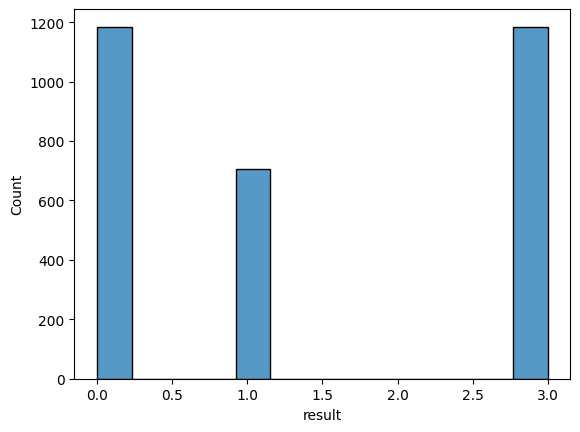

In [134]:
sea.histplot(df_2['result'])

In [135]:
df_temp = df_2.copy()

In [136]:
df_temp['Rolling Average 5 Sh'] = df_temp['sh'].rolling(5).mean()
df_temp['rolling_avg_sot'] = df_temp['sot'].rolling(5).mean()
df_temp['rolling_avg_xg'] = df_temp['xg'].rolling(5).mean()
df_temp


,date,comp,round,day,venue,result,opponent,xg,xga,poss,...,pkatt,team,season,Rolling Average 5 Sh,rolling_avg_sot,rolling_avg_xg,Rolling win rate,goal_diff,is_home,prev_date
1,2020-12-13,Premier League,Matchweek 12,Sun,Home,0,Burnley,1.6,1.4,65.0,...,0,Arsenal,2021,NaN,NaN,NaN,0.0,-1,1,2020-12-06
2,2021-05-19,Premier League,Matchweek 37,Wed,Away,3,Crystal Palace,1.8,1.0,68.0,...,0,Arsenal,2021,NaN,NaN,NaN,1.0,2,0,2020-12-13
3,2021-05-23,Premier League,Matchweek 38,Sun,Home,3,Brighton,0.8,0.2,54.0,...,0,Arsenal,2021,NaN,NaN,NaN,1.5,2,1,2021-05-19
4,2021-08-13,Premier League,Matchweek 1,Fri,Away,0,Brentford,1.3,1.2,64.0,...,0,Arsenal,2022,NaN,NaN,NaN,1.2,-2,0,2021-05-23
5,2021-08-22,Premier League,Matchweek 2,Sun,Home,0,Chelsea,0.3,3.1,35.0,...,0,Arsenal,2022,13.6,4.2,1.16,1.2,-2,1,2021-08-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3097,2025-04-26,Premier League,Matchweek 34,Sat,Home,3,Leicester City,2.0,1.1,56.0,...,0,Wolverhampton Wanderers,2025,13.6,4.0,1.68,3.0,3,1,2025-04-20
3098,2025-05-02,Premier League,Matchweek 35,Fri,Away,0,Manchester City,0.4,0.7,37.0,...,0,Wolverhampton Wanderers,2025,13.0,3.6,1.52,2.4,-1,0,2025-04-26
3099,2025-05-10,Premier League,Matchweek 36,Sat,Home,0,Brighton,0.9,1.6,56.0,...,0,Wolverhampton Wanderers,2025,10.6,3.0,1.18,1.8,-2,1,2025-05-02
3100,2025-05-20,Premier League,Matchweek 37,Tue,Away,0,Crystal Palace,1.4,1.7,69.0,...,0,Wolverhampton Wanderers,2025,10.4,2.6,0.98,1.2,-2,0,2025-05-10


In [137]:
df_temp['Rolling Average 5 Sh'] = (
    df_temp.groupby('team')['sh']
    .rolling(5, min_periods=1)
    .mean()
    .reset_index(level=0, drop=True)
)


In [138]:
df_temp['result'] = df['result'].map({'W':3, 'L':0,'D': 1})


In [139]:
df_temp['Rolling win rate'] = df_temp['result'].rolling(5).mean()

In [140]:
df_temp.head()

,date,comp,round,day,venue,result,opponent,xg,xga,poss,...,pkatt,team,season,Rolling Average 5 Sh,rolling_avg_sot,rolling_avg_xg,Rolling win rate,goal_diff,is_home,prev_date
1,2020-12-13,Premier League,Matchweek 12,Sun,Home,NaN,Burnley,1.6,1.4,65.0,...,0,Arsenal,2021,18.000000,NaN,NaN,NaN,-1,1,2020-12-06
2,2021-05-19,Premier League,Matchweek 37,Wed,Away,NaN,Crystal Palace,1.8,1.0,68.0,...,0,Arsenal,2021,12.000000,NaN,NaN,NaN,2,0,2020-12-13
3,2021-05-23,Premier League,Matchweek 38,Sun,Home,NaN,Brighton,0.8,0.2,54.0,...,0,Arsenal,2021,13.333333,NaN,NaN,NaN,2,1,2021-05-19
4,2021-08-13,Premier League,Matchweek 1,Fri,Away,NaN,Brentford,1.3,1.2,64.0,...,0,Arsenal,2022,15.500000,NaN,NaN,NaN,-2,0,2021-05-23
5,2021-08-22,Premier League,Matchweek 2,Sun,Home,NaN,Chelsea,0.3,3.1,35.0,...,0,Arsenal,2022,13.600000,4.2,1.16,NaN,-2,1,2021-08-13


In [141]:
df_temp['goal_diff'] = df_temp['gf'] - df_temp['ga']

In [142]:
df_temp

,date,comp,round,day,venue,result,opponent,xg,xga,poss,...,pkatt,team,season,Rolling Average 5 Sh,rolling_avg_sot,rolling_avg_xg,Rolling win rate,goal_diff,is_home,prev_date
1,2020-12-13,Premier League,Matchweek 12,Sun,Home,NaN,Burnley,1.6,1.4,65.0,...,0,Arsenal,2021,18.000000,NaN,NaN,NaN,-1,1,2020-12-06
2,2021-05-19,Premier League,Matchweek 37,Wed,Away,NaN,Crystal Palace,1.8,1.0,68.0,...,0,Arsenal,2021,12.000000,NaN,NaN,NaN,2,0,2020-12-13
3,2021-05-23,Premier League,Matchweek 38,Sun,Home,NaN,Brighton,0.8,0.2,54.0,...,0,Arsenal,2021,13.333333,NaN,NaN,NaN,2,1,2021-05-19
4,2021-08-13,Premier League,Matchweek 1,Fri,Away,NaN,Brentford,1.3,1.2,64.0,...,0,Arsenal,2022,15.500000,NaN,NaN,NaN,-2,0,2021-05-23
5,2021-08-22,Premier League,Matchweek 2,Sun,Home,NaN,Chelsea,0.3,3.1,35.0,...,0,Arsenal,2022,13.600000,4.2,1.16,NaN,-2,1,2021-08-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3097,2025-04-26,Premier League,Matchweek 34,Sat,Home,NaN,Leicester City,2.0,1.1,56.0,...,0,Wolverhampton Wanderers,2025,13.600000,4.0,1.68,NaN,3,1,2025-04-20
3098,2025-05-02,Premier League,Matchweek 35,Fri,Away,NaN,Manchester City,0.4,0.7,37.0,...,0,Wolverhampton Wanderers,2025,13.000000,3.6,1.52,NaN,-1,0,2025-04-26
3099,2025-05-10,Premier League,Matchweek 36,Sat,Home,NaN,Brighton,0.9,1.6,56.0,...,0,Wolverhampton Wanderers,2025,10.600000,3.0,1.18,NaN,-2,1,2025-05-02
3100,2025-05-20,Premier League,Matchweek 37,Tue,Away,NaN,Crystal Palace,1.4,1.7,69.0,...,0,Wolverhampton Wanderers,2025,10.400000,2.6,0.98,NaN,-2,0,2025-05-10


In [143]:
df_temp.columns


Index(['date', 'comp', 'round', 'day', 'venue', 'result', 'opponent', 'xg',
       'xga', 'poss', 'attendance', 'captain', 'formation', 'opp formation',
       'sh', 'sot', 'dist', 'fk', 'pk', 'pkatt', 'team', 'season',
       'Rolling Average 5 Sh', 'rolling_avg_sot', 'rolling_avg_xg',
       'Rolling win rate', 'goal_diff', 'is_home', 'prev_date'],
      dtype='object')

In [144]:
df_temp['is_home'] = df_temp['venue'].apply(lambda x: 1 if x == "Home" else 0)

In [145]:
df_temp

,date,comp,round,day,venue,result,opponent,xg,xga,poss,...,pkatt,team,season,Rolling Average 5 Sh,rolling_avg_sot,rolling_avg_xg,Rolling win rate,goal_diff,is_home,prev_date
1,2020-12-13,Premier League,Matchweek 12,Sun,Home,NaN,Burnley,1.6,1.4,65.0,...,0,Arsenal,2021,18.000000,NaN,NaN,NaN,-1,1,2020-12-06
2,2021-05-19,Premier League,Matchweek 37,Wed,Away,NaN,Crystal Palace,1.8,1.0,68.0,...,0,Arsenal,2021,12.000000,NaN,NaN,NaN,2,0,2020-12-13
3,2021-05-23,Premier League,Matchweek 38,Sun,Home,NaN,Brighton,0.8,0.2,54.0,...,0,Arsenal,2021,13.333333,NaN,NaN,NaN,2,1,2021-05-19
4,2021-08-13,Premier League,Matchweek 1,Fri,Away,NaN,Brentford,1.3,1.2,64.0,...,0,Arsenal,2022,15.500000,NaN,NaN,NaN,-2,0,2021-05-23
5,2021-08-22,Premier League,Matchweek 2,Sun,Home,NaN,Chelsea,0.3,3.1,35.0,...,0,Arsenal,2022,13.600000,4.2,1.16,NaN,-2,1,2021-08-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3097,2025-04-26,Premier League,Matchweek 34,Sat,Home,NaN,Leicester City,2.0,1.1,56.0,...,0,Wolverhampton Wanderers,2025,13.600000,4.0,1.68,NaN,3,1,2025-04-20
3098,2025-05-02,Premier League,Matchweek 35,Fri,Away,NaN,Manchester City,0.4,0.7,37.0,...,0,Wolverhampton Wanderers,2025,13.000000,3.6,1.52,NaN,-1,0,2025-04-26
3099,2025-05-10,Premier League,Matchweek 36,Sat,Home,NaN,Brighton,0.9,1.6,56.0,...,0,Wolverhampton Wanderers,2025,10.600000,3.0,1.18,NaN,-2,1,2025-05-02
3100,2025-05-20,Premier League,Matchweek 37,Tue,Away,NaN,Crystal Palace,1.4,1.7,69.0,...,0,Wolverhampton Wanderers,2025,10.400000,2.6,0.98,NaN,-2,0,2025-05-10


In [146]:
df_temp = df_temp.sort_values(['team', 'date'])
df_temp

,date,comp,round,day,venue,result,opponent,xg,xga,poss,...,pkatt,team,season,Rolling Average 5 Sh,rolling_avg_sot,rolling_avg_xg,Rolling win rate,goal_diff,is_home,prev_date
1,2020-12-13,Premier League,Matchweek 12,Sun,Home,NaN,Burnley,1.6,1.4,65.0,...,0,Arsenal,2021,18.000000,NaN,NaN,NaN,-1,1,2020-12-06
2,2021-05-19,Premier League,Matchweek 37,Wed,Away,NaN,Crystal Palace,1.8,1.0,68.0,...,0,Arsenal,2021,12.000000,NaN,NaN,NaN,2,0,2020-12-13
3,2021-05-23,Premier League,Matchweek 38,Sun,Home,NaN,Brighton,0.8,0.2,54.0,...,0,Arsenal,2021,13.333333,NaN,NaN,NaN,2,1,2021-05-19
4,2021-08-13,Premier League,Matchweek 1,Fri,Away,NaN,Brentford,1.3,1.2,64.0,...,0,Arsenal,2022,15.500000,NaN,NaN,NaN,-2,0,2021-05-23
5,2021-08-22,Premier League,Matchweek 2,Sun,Home,NaN,Chelsea,0.3,3.1,35.0,...,0,Arsenal,2022,13.600000,4.2,1.16,NaN,-2,1,2021-08-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3097,2025-04-26,Premier League,Matchweek 34,Sat,Home,NaN,Leicester City,2.0,1.1,56.0,...,0,Wolverhampton Wanderers,2025,13.600000,4.0,1.68,NaN,3,1,2025-04-20
3098,2025-05-02,Premier League,Matchweek 35,Fri,Away,NaN,Manchester City,0.4,0.7,37.0,...,0,Wolverhampton Wanderers,2025,13.000000,3.6,1.52,NaN,-1,0,2025-04-26
3099,2025-05-10,Premier League,Matchweek 36,Sat,Home,NaN,Brighton,0.9,1.6,56.0,...,0,Wolverhampton Wanderers,2025,10.600000,3.0,1.18,NaN,-2,1,2025-05-02
3100,2025-05-20,Premier League,Matchweek 37,Tue,Away,NaN,Crystal Palace,1.4,1.7,69.0,...,0,Wolverhampton Wanderers,2025,10.400000,2.6,0.98,NaN,-2,0,2025-05-10


In [147]:
df_temp['prev_date'] = df_temp.groupby('team')['date'].shift(1)
df_temp

,date,comp,round,day,venue,result,opponent,xg,xga,poss,...,pkatt,team,season,Rolling Average 5 Sh,rolling_avg_sot,rolling_avg_xg,Rolling win rate,goal_diff,is_home,prev_date
1,2020-12-13,Premier League,Matchweek 12,Sun,Home,NaN,Burnley,1.6,1.4,65.0,...,0,Arsenal,2021,18.000000,NaN,NaN,NaN,-1,1,NaN
2,2021-05-19,Premier League,Matchweek 37,Wed,Away,NaN,Crystal Palace,1.8,1.0,68.0,...,0,Arsenal,2021,12.000000,NaN,NaN,NaN,2,0,2020-12-13
3,2021-05-23,Premier League,Matchweek 38,Sun,Home,NaN,Brighton,0.8,0.2,54.0,...,0,Arsenal,2021,13.333333,NaN,NaN,NaN,2,1,2021-05-19
4,2021-08-13,Premier League,Matchweek 1,Fri,Away,NaN,Brentford,1.3,1.2,64.0,...,0,Arsenal,2022,15.500000,NaN,NaN,NaN,-2,0,2021-05-23
5,2021-08-22,Premier League,Matchweek 2,Sun,Home,NaN,Chelsea,0.3,3.1,35.0,...,0,Arsenal,2022,13.600000,4.2,1.16,NaN,-2,1,2021-08-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3097,2025-04-26,Premier League,Matchweek 34,Sat,Home,NaN,Leicester City,2.0,1.1,56.0,...,0,Wolverhampton Wanderers,2025,13.600000,4.0,1.68,NaN,3,1,2025-04-20
3098,2025-05-02,Premier League,Matchweek 35,Fri,Away,NaN,Manchester City,0.4,0.7,37.0,...,0,Wolverhampton Wanderers,2025,13.000000,3.6,1.52,NaN,-1,0,2025-04-26
3099,2025-05-10,Premier League,Matchweek 36,Sat,Home,NaN,Brighton,0.9,1.6,56.0,...,0,Wolverhampton Wanderers,2025,10.600000,3.0,1.18,NaN,-2,1,2025-05-02
3100,2025-05-20,Premier League,Matchweek 37,Tue,Away,NaN,Crystal Palace,1.4,1.7,69.0,...,0,Wolverhampton Wanderers,2025,10.400000,2.6,0.98,NaN,-2,0,2025-05-10


In [148]:
df_temp

,date,comp,round,day,venue,result,opponent,xg,xga,poss,...,pkatt,team,season,Rolling Average 5 Sh,rolling_avg_sot,rolling_avg_xg,Rolling win rate,goal_diff,is_home,prev_date
1,2020-12-13,Premier League,Matchweek 12,Sun,Home,NaN,Burnley,1.6,1.4,65.0,...,0,Arsenal,2021,18.000000,NaN,NaN,NaN,-1,1,NaN
2,2021-05-19,Premier League,Matchweek 37,Wed,Away,NaN,Crystal Palace,1.8,1.0,68.0,...,0,Arsenal,2021,12.000000,NaN,NaN,NaN,2,0,2020-12-13
3,2021-05-23,Premier League,Matchweek 38,Sun,Home,NaN,Brighton,0.8,0.2,54.0,...,0,Arsenal,2021,13.333333,NaN,NaN,NaN,2,1,2021-05-19
4,2021-08-13,Premier League,Matchweek 1,Fri,Away,NaN,Brentford,1.3,1.2,64.0,...,0,Arsenal,2022,15.500000,NaN,NaN,NaN,-2,0,2021-05-23
5,2021-08-22,Premier League,Matchweek 2,Sun,Home,NaN,Chelsea,0.3,3.1,35.0,...,0,Arsenal,2022,13.600000,4.2,1.16,NaN,-2,1,2021-08-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3097,2025-04-26,Premier League,Matchweek 34,Sat,Home,NaN,Leicester City,2.0,1.1,56.0,...,0,Wolverhampton Wanderers,2025,13.600000,4.0,1.68,NaN,3,1,2025-04-20
3098,2025-05-02,Premier League,Matchweek 35,Fri,Away,NaN,Manchester City,0.4,0.7,37.0,...,0,Wolverhampton Wanderers,2025,13.000000,3.6,1.52,NaN,-1,0,2025-04-26
3099,2025-05-10,Premier League,Matchweek 36,Sat,Home,NaN,Brighton,0.9,1.6,56.0,...,0,Wolverhampton Wanderers,2025,10.600000,3.0,1.18,NaN,-2,1,2025-05-02
3100,2025-05-20,Premier League,Matchweek 37,Tue,Away,NaN,Crystal Palace,1.4,1.7,69.0,...,0,Wolverhampton Wanderers,2025,10.400000,2.6,0.98,NaN,-2,0,2025-05-10


In [149]:
# df_temp.drop(['rest_days','prev_date'],axis=1,inplace = True)

In [150]:
df_temp

,date,comp,round,day,venue,result,opponent,xg,xga,poss,...,pkatt,team,season,Rolling Average 5 Sh,rolling_avg_sot,rolling_avg_xg,Rolling win rate,goal_diff,is_home,prev_date
1,2020-12-13,Premier League,Matchweek 12,Sun,Home,NaN,Burnley,1.6,1.4,65.0,...,0,Arsenal,2021,18.000000,NaN,NaN,NaN,-1,1,NaN
2,2021-05-19,Premier League,Matchweek 37,Wed,Away,NaN,Crystal Palace,1.8,1.0,68.0,...,0,Arsenal,2021,12.000000,NaN,NaN,NaN,2,0,2020-12-13
3,2021-05-23,Premier League,Matchweek 38,Sun,Home,NaN,Brighton,0.8,0.2,54.0,...,0,Arsenal,2021,13.333333,NaN,NaN,NaN,2,1,2021-05-19
4,2021-08-13,Premier League,Matchweek 1,Fri,Away,NaN,Brentford,1.3,1.2,64.0,...,0,Arsenal,2022,15.500000,NaN,NaN,NaN,-2,0,2021-05-23
5,2021-08-22,Premier League,Matchweek 2,Sun,Home,NaN,Chelsea,0.3,3.1,35.0,...,0,Arsenal,2022,13.600000,4.2,1.16,NaN,-2,1,2021-08-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3097,2025-04-26,Premier League,Matchweek 34,Sat,Home,NaN,Leicester City,2.0,1.1,56.0,...,0,Wolverhampton Wanderers,2025,13.600000,4.0,1.68,NaN,3,1,2025-04-20
3098,2025-05-02,Premier League,Matchweek 35,Fri,Away,NaN,Manchester City,0.4,0.7,37.0,...,0,Wolverhampton Wanderers,2025,13.000000,3.6,1.52,NaN,-1,0,2025-04-26
3099,2025-05-10,Premier League,Matchweek 36,Sat,Home,NaN,Brighton,0.9,1.6,56.0,...,0,Wolverhampton Wanderers,2025,10.600000,3.0,1.18,NaN,-2,1,2025-05-02
3100,2025-05-20,Premier League,Matchweek 37,Tue,Away,NaN,Crystal Palace,1.4,1.7,69.0,...,0,Wolverhampton Wanderers,2025,10.400000,2.6,0.98,NaN,-2,0,2025-05-10


In [151]:
df_temp.columns

Index(['date', 'comp', 'round', 'day', 'venue', 'result', 'opponent', 'xg',
       'xga', 'poss', 'attendance', 'captain', 'formation', 'opp formation',
       'sh', 'sot', 'dist', 'fk', 'pk', 'pkatt', 'team', 'season',
       'Rolling Average 5 Sh', 'rolling_avg_sot', 'rolling_avg_xg',
       'Rolling win rate', 'goal_diff', 'is_home', 'prev_date'],
      dtype='object')

In [152]:
Final_Features = ([
 'comp', 'round', 'day', 'venue', 'opponent', 'team', 'season',
 'xg', 'xga', 'sh', 'sot', 'dist', 'fk', 'pk', 'pkatt',
 'Rolling Average 5 Sh', 'rolling_avg_sot', 'rolling_avg_xg',
 'Rolling win rate', 'goal_diff', 'is_home'
]
)

In [153]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

categorical_data = ['comp','round','day','opponent','team','season']

le = LabelEncoder()

for col in categorical_data:
    df_temp[col] = le.fit_transform(df_temp[col])



In [154]:
# df_temp

In [155]:
df_temp.drop(['venue'],axis=1,inplace = True)

In [156]:
# df_temp

In [ ]:
scaler = StandardScaler()
numeric_cols = ['xg', 'xga', 'sh', 'sot', 'dist', 'fk', 'pk', 'pkatt', 'Rolling Average 5 Sh', 'rolling_avg_sot', 'rolling_avg_xg', 'Rolling win rate', 'goal_diff']
df_temp[numeric_cols] = scaler.fit_transform(df_temp[numeric_cols])

In [158]:
df_temp

,date,comp,round,day,venue,result,opponent,xg,xga,poss,...,pkatt,team,season,Rolling Average 5 Sh,rolling_avg_sot,rolling_avg_xg,Rolling win rate,goal_diff,is_home,prev_date
1,2020-12-13,0,3,3,Home,NaN,5,1.6,1.4,65.0,...,0,0,0,18.000000,NaN,NaN,NaN,-1,1,NaN
2,2021-05-19,0,30,6,Away,NaN,7,1.8,1.0,68.0,...,0,0,0,12.000000,NaN,NaN,NaN,2,0,2020-12-13
3,2021-05-23,0,31,3,Home,NaN,4,0.8,0.2,54.0,...,0,0,0,13.333333,NaN,NaN,NaN,2,1,2021-05-19
4,2021-08-13,0,0,0,Away,NaN,3,1.3,1.2,64.0,...,0,0,1,15.500000,NaN,NaN,NaN,-2,0,2021-05-23
5,2021-08-22,0,11,3,Home,NaN,6,0.3,3.1,35.0,...,0,0,1,13.600000,4.2,1.16,NaN,-2,1,2021-08-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3097,2025-04-26,0,27,2,Home,NaN,12,2.0,1.1,56.0,...,0,26,4,13.600000,4.0,1.68,NaN,3,1,2025-04-20
3098,2025-05-02,0,28,0,Away,NaN,15,0.4,0.7,37.0,...,0,26,4,13.000000,3.6,1.52,NaN,-1,0,2025-04-26
3099,2025-05-10,0,29,2,Home,NaN,4,0.9,1.6,56.0,...,0,26,4,10.600000,3.0,1.18,NaN,-2,1,2025-05-02
3100,2025-05-20,0,30,5,Away,NaN,7,1.4,1.7,69.0,...,0,26,4,10.400000,2.6,0.98,NaN,-2,0,2025-05-10


In [159]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [160]:
df_temp = df_temp.sort_values(['team', 'date']).reset_index(drop=True)


In [161]:
df_temp['rolling_avg_sot'] = (
    df_temp.groupby('team')['sot']
    .rolling(5, min_periods=1)
    .mean()
    .reset_index(level=0, drop=True)
)


In [162]:
df_temp['rolling_avg_xg'] = (
    df_temp.groupby('team')['xg']
    .rolling(5, min_periods=1)
    .mean()
    .reset_index(level=0, drop=True)
)


In [163]:
df_temp['Rolling win rate'] = (
    df_temp.groupby('team')['result']
    .rolling(5, min_periods=1)
    .mean()
    .reset_index(level=0, drop=True)
)


In [164]:
# df_temp

In [165]:
df_temp.drop(['gf','ga'],axis=1,inplace = True)

In [166]:
df_temp

,date,comp,round,day,venue,result,opponent,xg,xga,poss,...,pkatt,team,season,Rolling Average 5 Sh,rolling_avg_sot,rolling_avg_xg,Rolling win rate,goal_diff,is_home,prev_date
1,2020-12-13,0,3,3,Home,NaN,5,1.6,1.4,65.0,...,0,0,0,18.000000,6.000000,1.600,NaN,-1,1,NaN
2,2021-05-19,0,30,6,Away,NaN,7,1.8,1.0,68.0,...,0,0,0,12.000000,4.500000,1.700,NaN,2,0,2020-12-13
3,2021-05-23,0,31,3,Home,NaN,4,0.8,0.2,54.0,...,0,0,0,13.333333,4.666667,1.400,NaN,2,1,2021-05-19
4,2021-08-13,0,0,0,Away,NaN,3,1.3,1.2,64.0,...,0,0,1,15.500000,4.500000,1.375,NaN,-2,0,2021-05-23
5,2021-08-22,0,11,3,Home,NaN,6,0.3,3.1,35.0,...,0,0,1,13.600000,4.200000,1.160,NaN,-2,1,2021-08-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3097,2025-04-26,0,27,2,Home,NaN,12,2.0,1.1,56.0,...,0,26,4,13.600000,4.000000,1.680,NaN,3,1,2025-04-20
3098,2025-05-02,0,28,0,Away,NaN,15,0.4,0.7,37.0,...,0,26,4,13.000000,3.600000,1.520,NaN,-1,0,2025-04-26
3099,2025-05-10,0,29,2,Home,NaN,4,0.9,1.6,56.0,...,0,26,4,10.600000,3.000000,1.180,NaN,-2,1,2025-05-02
3100,2025-05-20,0,30,5,Away,NaN,7,1.4,1.7,69.0,...,0,26,4,10.400000,2.600000,0.980,NaN,-2,0,2025-05-10


In [167]:
df_temp.drop(['goal_diff'],axis=1,inplace = True)

In [168]:
features = [
    'comp','round','day','opponent','team','season',
    'xg','xga','poss','attendance','sh','sot','dist','fk','pk','pkatt',
    'Rolling Average 5 Sh','rolling_avg_sot','rolling_avg_xg',
    'Rolling win rate','is_home'
]

X = df_temp[features]
y = df_temp['result']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf = RandomForestClassifier(n_estimators=300, max_depth=12, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("RandomForest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

In [ ]:
from xgboost import XGBClassifier

In [ ]:
model_boost = XGBClassifier(
    n_estimators=500,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='mlogloss'
)


In [ ]:
model_boost.fit(X_train, y_train)

In [ ]:
model_boost.score(X_test,y_test)

print("xgboost Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

model_boost = XGBClassifier(
    objective='multi:softprob',
    eval_metric='mlogloss',
    random_state=42
)

param_dist = {
    'n_estimators': [200, 300, 400, 500, 600],
    'max_depth': [3, 4, 5, 6, 8, 10],
    'learning_rate': [0.001, 0.01, 0.05, 0.1],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'min_child_weight': [1, 2, 3, 5, 7],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4]
}

tuner = RandomizedSearchCV(
    estimator=model_boost,
    param_distributions=param_dist,
    n_iter=30,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

tuner.fit(X_train, y_train)



In [ ]:
print("Best Params:", tuner.best_params_)
print("Best CV Accuracy:", tuner.best_score_)


In [ ]:
best_xgb = tuner.best_estimator_

y_pred = best_xgb.predict(X_test)

print("Tuned XGBoost Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


In [ ]:
import joblib
joblib.dump(best_xgb, "match_predictor.pkl")


In [ ]:
joblib.dump(scaler, "scaler.pkl")


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("KNN Accuracy:", accuracy)
print

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(multi_class='multinomial', max_iter=500)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)
print

In [ ]:
!pip install catboost


In [ ]:
cat_features = ['comp','round','day','opponent','team','season']


In [ ]:
from catboost import CatBoostClassifier


In [ ]:
cat_model = CatBoostClassifier(
    iterations=600,
    depth=6,
    learning_rate=0.05,
    loss_function='MultiClass',
    random_state=42,
    verbose=100
)


In [ ]:
cat_model.fit(
    X_train,
    y_train,
    cat_features=cat_features,
    eval_set=(X_test, y_test),
    verbose=100
)


In [ ]:
y_pred = cat_model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("CatBoost Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


In [ ]:
# df_temp

In [ ]:
df_temp

In [ ]:
df_temp.to_csv('final_matches.csv', index=False)